# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [32]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a much larger range than GPA (0 - 800 vs 0 - 4)

#### Question 4. Drop data points with missing data


In [6]:
df_no_missing = df_raw.dropna()
df_no_missing

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [8]:
df_no_missing.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Answer: When I run a count function on my new dataframe (df_no_missing), I notice that each output has exactly 397 rows.

#### Question 6. Create box plots for GRE and GPA

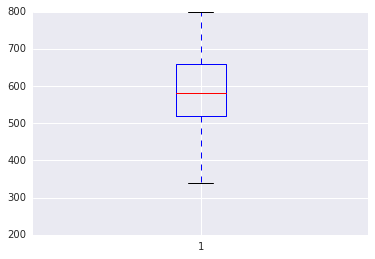

In [25]:
#boxplot 1
plt.boxplot(df_no_missing['gre']);

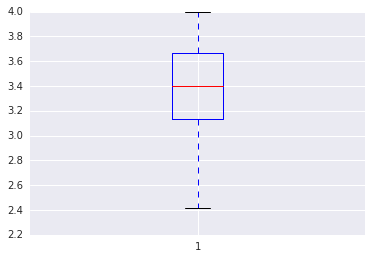

In [27]:
#boxplot 2 
plt.boxplot(df_no_missing['gpa']);

#### Question 7. What do this plots show?

Answer: These plots show the minimum (bottom line), maximum (top line), median (red line), IQR (box), 1st quartile (bottom of box), & 3rd quartile (top of box)

#### Question 8. Describe each distribution 

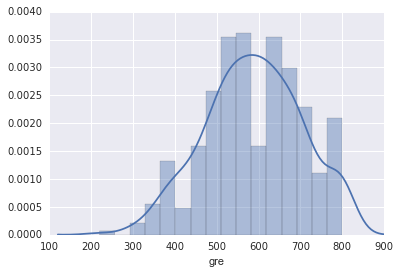

In [37]:
# plot the distribution of each variable 
sns.distplot(df_no_missing['gre'])

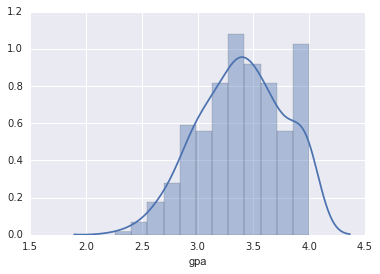

In [38]:
sns.distplot(df_no_missing['gpa'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, the variables both have non-zero skewness (see below)

In [36]:
df_no_missing['gre'].skew()

-0.146046988215597

In [41]:
df_no_missing['gpa'].skew()

-0.21688893296924305

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Both distributions are skewed slightly to the right so the distributions are not normal. We prefer dealing with normal distributions because many statistical modeling techniques assume a normal distribution. We can try transforming our data with a log10 to correct the data. If this doesn't work, we can continue moving down the ladder of powers from θ=1 as described in the following: (http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_03.pdf)

#### Question 11. Which of our variables are potentially colinear? 

In [40]:
# create a correlation matrix for the data
df_no_missing.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: None of the variables seem to be very highly correlated. The highest correlation is between GPA and GRE at 0.38.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: First, analyze the data and ensure that all datapoints are parseable. Next, clean the data by removing all null or NaN values. Next, analyze the range, mean, & std of prestige values given a student was not accepted (0) and compare those summary statistics to those where the student was accepted (1). If we find that the prestige scores are generally higher amongst students who were accepted into graduate programs, we can assume that prestige has a positive correlation with admission status. If we find the inverse is true, prestige and admission have a negative correlation. If the data is similar for both admission statuses, we would find that prestige is not a reliable variable to predict admissions.

#### Question 14. What is your hypothesis? 

Answer: The prestige of an applicant's alma mater has little impact on the applicant's admission into graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data